**Online news article data- II- Fourteen classes**

In [1]:
import pandas as pd

Dataset2 = pd.read_csv('Dataset2.csv')
Dataset2

,category,body
0,ARTS & CULTURE,octob carolyn kramer receiv disturb phone call...
1,ARTS & CULTURE,week talk actor jeff hiller hit broadway play ...
2,ARTS & CULTURE,new yorker take presid donald trump ask u woul...
3,ARTS & CULTURE,kellen hickey year old live hudson wisconsin g...
4,ARTS & CULTURE,someth combin tradit uptight look renaiss peri...
...,...,...
6810,WOMEN,still think tuesday night dinner year old daug...
6811,WOMEN,rememb morn high school graduat clearli put wh...
6812,WOMEN,husband gene wear pajama ask told never pajama...
6813,WOMEN,antonioguillem via thinkstock lisa donoghu lin...


In [2]:
import warnings as DDD
DDD.filterwarnings("ignore")

In [3]:
Dataset2.category.value_counts()

category
ARTS & CULTURE    1000
BUSINESS           501
POLITICS           501
RELIGION           501
SPORTS             501
WOMEN              501
TECH               500
ENTERTAINMENT      497
EDUCATION          490
ENVIRONMENT        452
COMEDY             376
SCIENCE            350
MEDIA              346
CRIME              299
Name: count, dtype: int64

* Fourteen classes in output category

In [4]:
o_Dataset2= Dataset2['category']

In [5]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np

text_data = Dataset2['body'].values.astype('U')

tokenized_data = [word_tokenize(text.lower()) for text in text_data]

model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=1, workers=4)

word_vectors = []
for sentence in tokenized_data:
    vec = np.zeros(model.vector_size)  
    num_words = 0
    for word in sentence:
        if word in model.wv:
            vec += model.wv[word]
            num_words += 1
    if num_words > 0:
        vec /= num_words  # Average the vectors
    word_vectors.append(vec)

# Convert word_vectors to array
i_Data = np.array(word_vectors)

print("Shape of word vectors array:", i_Data.shape)

Shape of word vectors array: (6815, 100)


In [6]:
from sklearn.model_selection import train_test_split as TTS

ir_Data2, is_Data2, or_Data2, os_Data2 = TTS(i_Data, o_Dataset2, test_size= 0.4, random_state= 223)
iv_Data2, is_Data2, ov_Data2, os_Data2 = TTS(is_Data2, os_Data2, test_size= 0.5, random_state= 223)

In [7]:
ir_Data2.shape #      train

(4089, 100)

In [8]:
iv_Data2.shape #          Validation

(1363, 100)

In [9]:
is_Data2.shape #      test

(1363, 100)

## **Machine Learning Algorithms**

In [10]:
from sklearn.metrics import classification_report as CR
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import ConfusionMatrixDisplay as CMD
from sklearn.metrics import accuracy_score
import time as T
from sklearn.model_selection import GridSearchCV as GS

**Logistic Regression**


In [11]:
from sklearn.linear_model import LogisticRegression as LR

ONA_K = {'penalty': ['l1', 'l2', 'elasticnet', None],
            'multi_class': ['auto', 'ovr', 'multinomial']}

ONA_KM = LR(random_state= 223)
ONA_KM = GS(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_Data2[:500],or_Data2[:500])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'multi_class': 'auto', 'penalty': 'l2'}
0.608


In [12]:
Mteric_s = T.time()

Mo_News = LR(**ONA_KM.best_params_)
Mo_News.fit(ir_Data2, or_Data2)

Mteric_d = T.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 0.8198504447937012


LogisticRegression()

                precision    recall  f1-score   support

ARTS & CULTURE       0.74      0.80      0.77       184
      BUSINESS       0.69      0.54      0.61       112
        COMEDY       0.74      0.61      0.67        79
         CRIME       0.73      0.85      0.79        72
     EDUCATION       0.79      0.82      0.80        98
 ENTERTAINMENT       0.65      0.65      0.65       107
   ENVIRONMENT       0.57      0.59      0.58        96
         MEDIA       0.72      0.56      0.63        84
      POLITICS       0.58      0.68      0.63        95
      RELIGION       0.77      0.72      0.74       107
       SCIENCE       0.59      0.55      0.57        74
        SPORTS       0.64      0.75      0.69        76
          TECH       0.71      0.73      0.72        89
         WOMEN       0.61      0.62      0.62        90

      accuracy                           0.68      1363
     macro avg       0.68      0.68      0.68      1363
  weighted avg       0.69      0.68      0.68 

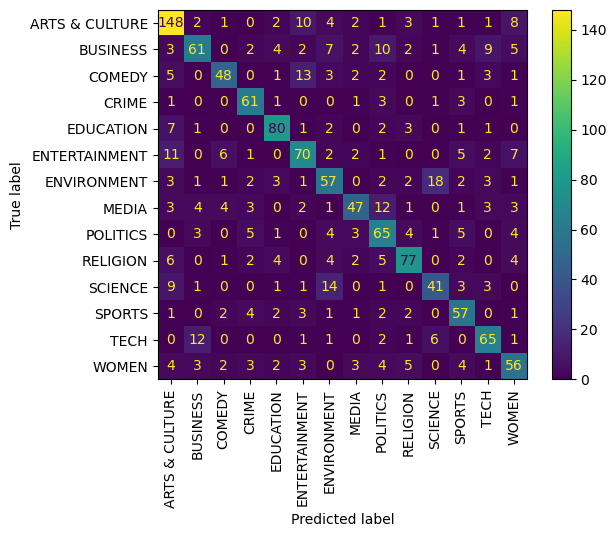

In [13]:
Mteric_s = T.time()

pe_Data2 = Mo_News.predict(iv_Data2)
print(CR(ov_Data2,pe_Data2))
L = CM(ov_Data2,pe_Data2)
D = CMD(confusion_matrix = L, display_labels = ['ARTS & CULTURE','BUSINESS','COMEDY','CRIME','EDUCATION', 'ENTERTAINMENT','ENVIRONMENT','MEDIA','POLITICS','RELIGION','SCIENCE','SPORTS','TECH','WOMEN'])
D.plot(xticks_rotation =90)

Mteric_d = T.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

                precision    recall  f1-score   support

ARTS & CULTURE       0.70      0.78      0.74       209
      BUSINESS       0.63      0.58      0.60        92
        COMEDY       0.65      0.65      0.65        69
         CRIME       0.76      0.84      0.79        67
     EDUCATION       0.84      0.84      0.84       102
 ENTERTAINMENT       0.56      0.60      0.58        84
   ENVIRONMENT       0.68      0.70      0.69        96
         MEDIA       0.62      0.41      0.50        73
      POLITICS       0.58      0.74      0.65        80
      RELIGION       0.81      0.80      0.81       120
       SCIENCE       0.78      0.61      0.69        70
        SPORTS       0.80      0.77      0.78        99
          TECH       0.71      0.63      0.67       101
         WOMEN       0.64      0.65      0.65       101

      accuracy                           0.70      1363
     macro avg       0.70      0.69      0.69      1363
  weighted avg       0.70      0.70      0.70 

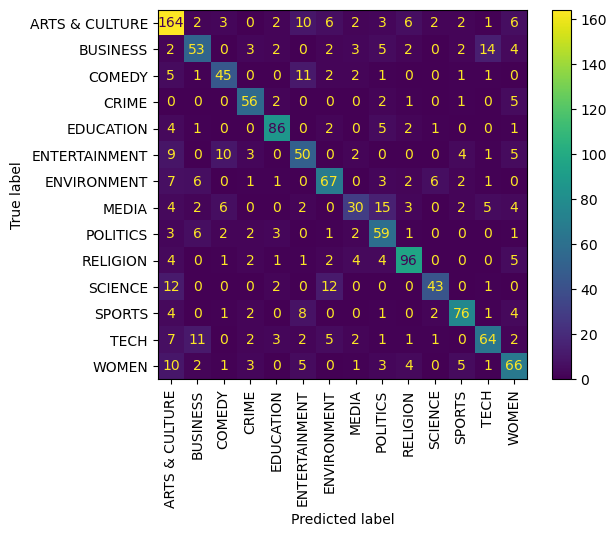

In [14]:
Mteric_s = T.time()

pe_Data2 = Mo_News.predict(is_Data2)
print(CR(os_Data2,pe_Data2))
L = CM(os_Data2,pe_Data2)
D = CMD(confusion_matrix = L, display_labels = ['ARTS & CULTURE','BUSINESS','COMEDY','CRIME','EDUCATION', 'ENTERTAINMENT','ENVIRONMENT','MEDIA','POLITICS','RELIGION','SCIENCE','SPORTS','TECH','WOMEN'])
D.plot(xticks_rotation=90)

Mteric_d = T.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

In [15]:
accuracy_LR = round(accuracy_score(os_Data2,pe_Data2),2)
accuracy_LR

0.7

**SVM**


In [16]:
from sklearn.svm import SVC as svc

ONA_K = {'max_iter': [1, -1, 2, 3],
            'decision_function_shape': ['ovo', 'ovr'],
         'kernel': ['sigmpid', 'poly', 'rbf']}

ONA_KM = svc(random_state= 223)
ONA_KM = GS(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_Data2[:500],or_Data2[:500])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'decision_function_shape': 'ovo', 'kernel': 'rbf', 'max_iter': -1}
0.512


In [17]:
Mteric_s = T.time()

Mo_News = svc(**ONA_KM.best_params_)
Mo_News.fit(ir_Data2, or_Data2)

Mteric_d = T.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 2.509147882461548


SVC(decision_function_shape='ovo')

                precision    recall  f1-score   support

ARTS & CULTURE       0.12      0.15      0.13       184
      BUSINESS       0.10      0.07      0.08       112
        COMEDY       0.06      0.05      0.05        79
         CRIME       0.07      0.07      0.07        72
     EDUCATION       0.05      0.05      0.05        98
 ENTERTAINMENT       0.03      0.03      0.03       107
   ENVIRONMENT       0.07      0.07      0.07        96
         MEDIA       0.19      0.11      0.14        84
      POLITICS       0.06      0.06      0.06        95
      RELIGION       0.09      0.10      0.10       107
       SCIENCE       0.05      0.04      0.05        74
        SPORTS       0.07      0.09      0.08        76
          TECH       0.09      0.09      0.09        89
         WOMEN       0.06      0.07      0.06        90

      accuracy                           0.08      1363
     macro avg       0.08      0.08      0.08      1363
  weighted avg       0.08      0.08      0.08 

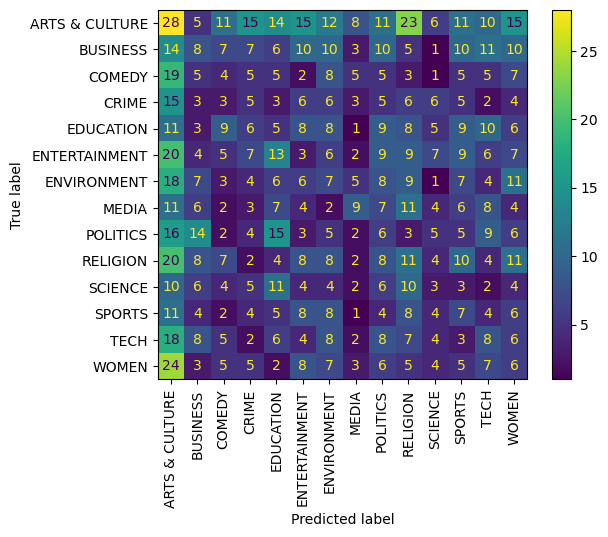

In [18]:
Mteric_s = T.time()

pe_ON_NeWs_ATL = Mo_News.predict(iv_Data2)
print(CR(ov_Data2,pe_Data2))
L = CM(ov_Data2,pe_Data2)
D = CMD(confusion_matrix = L, display_labels = ['ARTS & CULTURE','BUSINESS','COMEDY','CRIME','EDUCATION', 'ENTERTAINMENT','ENVIRONMENT','MEDIA','POLITICS','RELIGION','SCIENCE','SPORTS','TECH','WOMEN'])
D.plot(xticks_rotation=90)

Mteric_d = T.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

                precision    recall  f1-score   support

ARTS & CULTURE       0.66      0.75      0.70       209
      BUSINESS       0.61      0.59      0.60        92
        COMEDY       0.65      0.62      0.64        69
         CRIME       0.74      0.81      0.77        67
     EDUCATION       0.84      0.81      0.83       102
 ENTERTAINMENT       0.50      0.57      0.53        84
   ENVIRONMENT       0.68      0.70      0.69        96
         MEDIA       0.60      0.40      0.48        73
      POLITICS       0.55      0.74      0.63        80
      RELIGION       0.83      0.72      0.77       120
       SCIENCE       0.74      0.61      0.67        70
        SPORTS       0.82      0.73      0.77        99
          TECH       0.75      0.66      0.71       101
         WOMEN       0.61      0.65      0.63       101

      accuracy                           0.68      1363
     macro avg       0.68      0.67      0.67      1363
  weighted avg       0.69      0.68      0.68 

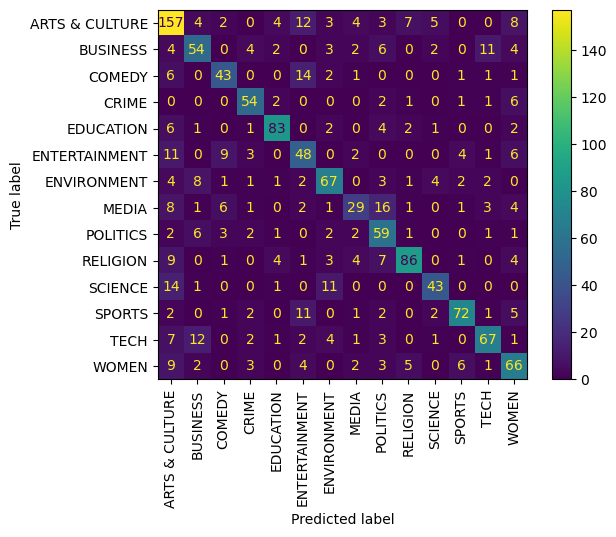

In [19]:
Mteric_s = T.time()

pe_Data2 = Mo_News.predict(is_Data2)
print(CR(os_Data2,pe_Data2))
L = CM(os_Data2,pe_Data2)
D = CMD(confusion_matrix = L, display_labels = ['ARTS & CULTURE','BUSINESS','COMEDY','CRIME','EDUCATION', 'ENTERTAINMENT','ENVIRONMENT','MEDIA','POLITICS','RELIGION','SCIENCE','SPORTS','TECH','WOMEN'])
D.plot(xticks_rotation=90)

Mteric_d = T.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

In [20]:
accuracy_SVM = round(accuracy_score(os_Data2,pe_Data2),2)
accuracy_SVM

0.68

**Decision Tree**


In [21]:
from sklearn.tree import DecisionTreeClassifier as DT
ONA_K = {'criterion': ['gini', 'entropy', 'log_loss'],
            'max_features': ['auto', 'sqrt', 'log2']}

ONA_KM = DT(random_state= 223)
ONA_KM = GS(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_Data2[:500],or_Data2[:500])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'criterion': 'entropy', 'max_features': 'log2'}
0.32999999999999996


In [22]:
Mteric_s = T.time()

Mo_News = DT(**ONA_KM.best_params_)
Mo_News.fit(ir_Data2, or_Data2)

Mteric_d = T.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 0.5300228595733643


DecisionTreeClassifier(criterion='entropy', max_features='log2')

                precision    recall  f1-score   support

ARTS & CULTURE       0.50      0.54      0.52       184
      BUSINESS       0.42      0.38      0.39       112
        COMEDY       0.39      0.39      0.39        79
         CRIME       0.62      0.64      0.63        72
     EDUCATION       0.53      0.53      0.53        98
 ENTERTAINMENT       0.38      0.35      0.36       107
   ENVIRONMENT       0.28      0.27      0.28        96
         MEDIA       0.34      0.27      0.30        84
      POLITICS       0.40      0.44      0.42        95
      RELIGION       0.42      0.36      0.39       107
       SCIENCE       0.41      0.32      0.36        74
        SPORTS       0.38      0.55      0.45        76
          TECH       0.39      0.42      0.40        89
         WOMEN       0.26      0.28      0.27        90

      accuracy                           0.41      1363
     macro avg       0.41      0.41      0.41      1363
  weighted avg       0.41      0.41      0.41 

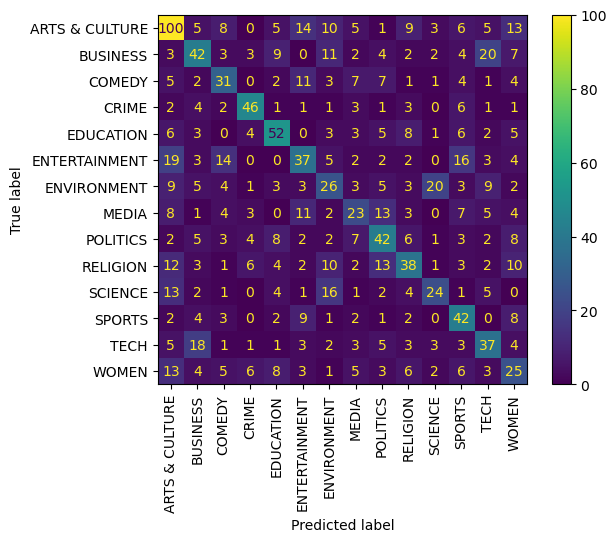

In [23]:
Mteric_s = T.time()

pe_Data2 = Mo_News.predict(iv_Data2)
print(CR(ov_Data2,pe_Data2))
L = CM(ov_Data2,pe_Data2)
D = CMD(confusion_matrix = L, display_labels = ['ARTS & CULTURE','BUSINESS','COMEDY','CRIME','EDUCATION', 'ENTERTAINMENT','ENVIRONMENT','MEDIA','POLITICS','RELIGION','SCIENCE','SPORTS','TECH','WOMEN'])
D.plot(xticks_rotation=90)

Mteric_d = T.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

                precision    recall  f1-score   support

ARTS & CULTURE       0.51      0.48      0.50       209
      BUSINESS       0.30      0.34      0.32        92
        COMEDY       0.33      0.39      0.36        69
         CRIME       0.54      0.55      0.55        67
     EDUCATION       0.57      0.55      0.56       102
 ENTERTAINMENT       0.27      0.33      0.30        84
   ENVIRONMENT       0.31      0.29      0.30        96
         MEDIA       0.27      0.21      0.23        73
      POLITICS       0.33      0.45      0.38        80
      RELIGION       0.41      0.33      0.36       120
       SCIENCE       0.38      0.34      0.36        70
        SPORTS       0.51      0.54      0.52        99
          TECH       0.38      0.39      0.38       101
         WOMEN       0.35      0.33      0.34       101

      accuracy                           0.40      1363
     macro avg       0.39      0.39      0.39      1363
  weighted avg       0.40      0.40      0.40 

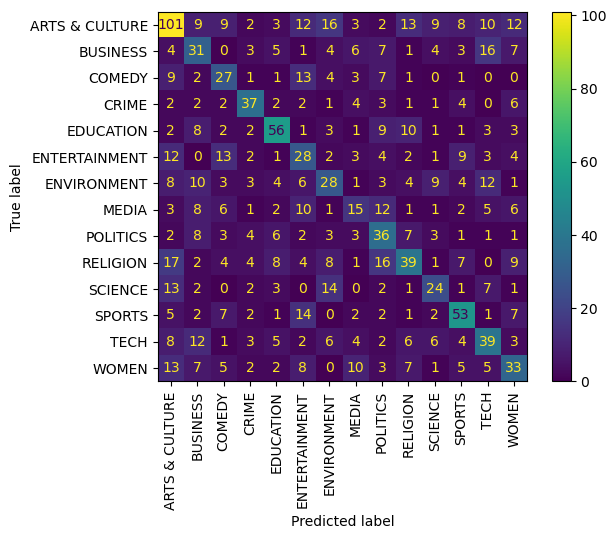

In [24]:
Mteric_s = T.time()

pe_Data2 = Mo_News.predict(is_Data2)
print(CR(os_Data2,pe_Data2))
L = CM(os_Data2,pe_Data2)
D = CMD(confusion_matrix = L, display_labels = ['ARTS & CULTURE','BUSINESS','COMEDY','CRIME','EDUCATION', 'ENTERTAINMENT','ENVIRONMENT','MEDIA','POLITICS','RELIGION','SCIENCE','SPORTS','TECH','WOMEN'])
D.plot(xticks_rotation=90)

Mteric_d = T.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

In [25]:
accuracy_DT = round(accuracy_score(os_Data2,pe_Data2),2)
accuracy_DT

0.4

**Random Forest**


In [26]:
from sklearn.ensemble import RandomForestClassifier as RF

ONA_K = {'criterion': ['gini', 'entropy', 'log_loss'],
            'max_features': ['auto', 'sqrt', 'log2']}

ONA_KM = RF(random_state= 223)
ONA_KM = GS(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_Data2[:500],or_Data2[:500])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'criterion': 'entropy', 'max_features': 'sqrt'}
0.57


In [27]:
Mteric_s = T.time()

Mo_News = RF(**ONA_KM.best_params_)
Mo_News.fit(ir_Data2, or_Data2)

Mteric_d = T.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 60.413050174713135


RandomForestClassifier(criterion='entropy')

                precision    recall  f1-score   support

ARTS & CULTURE       0.62      0.80      0.70       184
      BUSINESS       0.66      0.57      0.61       112
        COMEDY       0.76      0.56      0.64        79
         CRIME       0.70      0.88      0.78        72
     EDUCATION       0.75      0.77      0.76        98
 ENTERTAINMENT       0.58      0.66      0.62       107
   ENVIRONMENT       0.62      0.57      0.59        96
         MEDIA       0.72      0.50      0.59        84
      POLITICS       0.57      0.73      0.64        95
      RELIGION       0.74      0.64      0.68       107
       SCIENCE       0.68      0.54      0.60        74
        SPORTS       0.63      0.70      0.66        76
          TECH       0.72      0.65      0.69        89
         WOMEN       0.57      0.48      0.52        90

      accuracy                           0.65      1363
     macro avg       0.67      0.65      0.65      1363
  weighted avg       0.66      0.65      0.65 

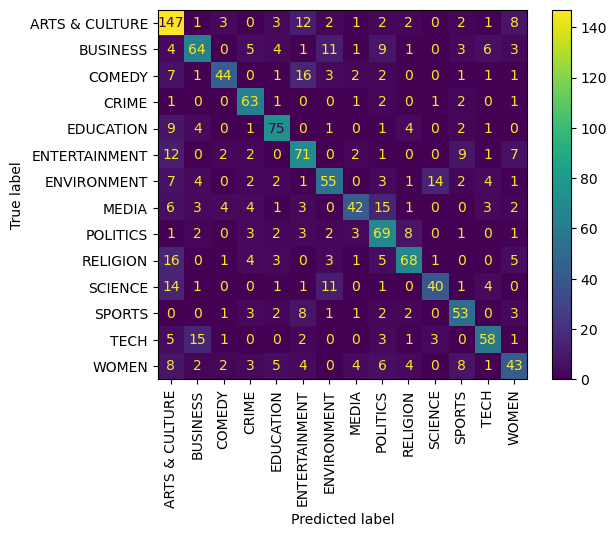

In [28]:
Mteric_s = T.time()

pe_Data2 = Mo_News.predict(iv_Data2)
print(CR(ov_Data2,pe_Data2))
L = CM(ov_Data2,pe_Data2)
D = CMD(confusion_matrix = L, display_labels = ['ARTS & CULTURE','BUSINESS','COMEDY','CRIME','EDUCATION', 'ENTERTAINMENT','ENVIRONMENT','MEDIA','POLITICS','RELIGION','SCIENCE','SPORTS','TECH','WOMEN'])
D.plot(xticks_rotation=90)

Mteric_d = T.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

                precision    recall  f1-score   support

ARTS & CULTURE       0.65      0.78      0.71       209
      BUSINESS       0.57      0.54      0.56        92
        COMEDY       0.67      0.67      0.67        69
         CRIME       0.71      0.79      0.75        67
     EDUCATION       0.75      0.78      0.77       102
 ENTERTAINMENT       0.48      0.56      0.52        84
   ENVIRONMENT       0.70      0.61      0.66        96
         MEDIA       0.70      0.38      0.50        73
      POLITICS       0.51      0.72      0.60        80
      RELIGION       0.73      0.64      0.68       120
       SCIENCE       0.71      0.57      0.63        70
        SPORTS       0.72      0.71      0.71        99
          TECH       0.65      0.58      0.61       101
         WOMEN       0.66      0.60      0.63       101

      accuracy                           0.65      1363
     macro avg       0.66      0.64      0.64      1363
  weighted avg       0.66      0.65      0.65 

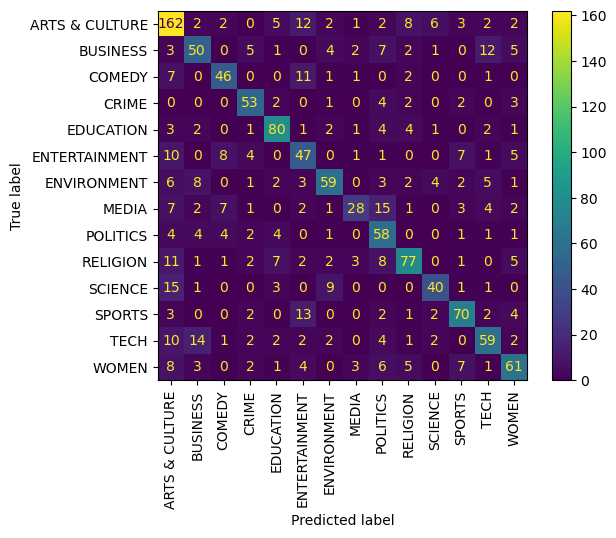

In [29]:
Mteric_s = T.time()

pe_Data2 = Mo_News.predict(is_Data2)
print(CR(os_Data2,pe_Data2))
L = CM(os_Data2,pe_Data2)
D = CMD(confusion_matrix = L, display_labels = ['ARTS & CULTURE','BUSINESS','COMEDY','CRIME','EDUCATION', 'ENTERTAINMENT','ENVIRONMENT','MEDIA','POLITICS','RELIGION','SCIENCE','SPORTS','TECH','WOMEN'])
D.plot(xticks_rotation=90)

Mteric_d = T.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

In [30]:
accuracy_RF = round(accuracy_score(os_Data2,pe_Data2),2)
accuracy_RF

0.65

**Gradient Boosting**

In [31]:
from sklearn.ensemble import GradientBoostingClassifier as GB

ONA_K = {'criterion': ['friedman_mse', 'squared_error'],
            'max_features': ['sqrt', 'log2']}

ONA_KM = GB(random_state= 223)
ONA_KM = GS(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_Data2[:500],or_Data2[:500])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'criterion': 'friedman_mse', 'max_features': 'sqrt'}
0.558


In [32]:
Mteric_s = T.time()

Mo_News = GB(**ONA_KM.best_params_)
Mo_News.fit(ir_Data2, or_Data2)

Mteric_d = T.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 197.2385289669037


GradientBoostingClassifier(max_features='sqrt')

                precision    recall  f1-score   support

ARTS & CULTURE       0.69      0.79      0.73       184
      BUSINESS       0.61      0.55      0.58       112
        COMEDY       0.68      0.63      0.66        79
         CRIME       0.79      0.85      0.82        72
     EDUCATION       0.76      0.80      0.78        98
 ENTERTAINMENT       0.58      0.59      0.59       107
   ENVIRONMENT       0.62      0.61      0.62        96
         MEDIA       0.73      0.55      0.63        84
      POLITICS       0.63      0.75      0.69        95
      RELIGION       0.71      0.67      0.69       107
       SCIENCE       0.67      0.54      0.60        74
        SPORTS       0.64      0.71      0.67        76
          TECH       0.67      0.67      0.67        89
         WOMEN       0.59      0.56      0.57        90

      accuracy                           0.67      1363
     macro avg       0.67      0.66      0.66      1363
  weighted avg       0.67      0.67      0.67 

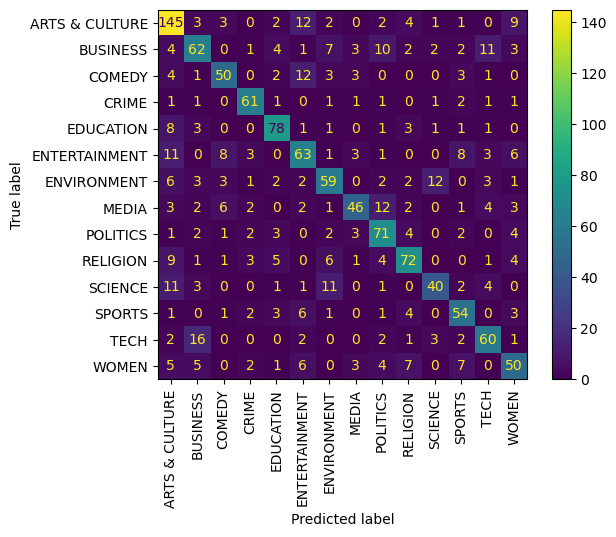

In [33]:
Mteric_s = T.time()

pe_Data2 = Mo_News.predict(iv_Data2)
print(CR(ov_Data2,pe_Data2))
L = CM(ov_Data2,pe_Data2)
D = CMD(confusion_matrix = L, display_labels = ['ARTS & CULTURE','BUSINESS','COMEDY','CRIME','EDUCATION', 'ENTERTAINMENT','ENVIRONMENT','MEDIA','POLITICS','RELIGION','SCIENCE','SPORTS','TECH','WOMEN'])
D.plot(xticks_rotation=90)

Mteric_d = T.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

                precision    recall  f1-score   support

ARTS & CULTURE       0.67      0.76      0.71       209
      BUSINESS       0.64      0.59      0.61        92
        COMEDY       0.65      0.68      0.67        69
         CRIME       0.77      0.69      0.72        67
     EDUCATION       0.78      0.77      0.78       102
 ENTERTAINMENT       0.55      0.54      0.54        84
   ENVIRONMENT       0.74      0.70      0.72        96
         MEDIA       0.56      0.40      0.46        73
      POLITICS       0.51      0.74      0.60        80
      RELIGION       0.80      0.68      0.74       120
       SCIENCE       0.83      0.69      0.75        70
        SPORTS       0.72      0.77      0.75        99
          TECH       0.68      0.68      0.68       101
         WOMEN       0.65      0.64      0.65       101

      accuracy                           0.68      1363
     macro avg       0.68      0.67      0.67      1363
  weighted avg       0.68      0.68      0.68 

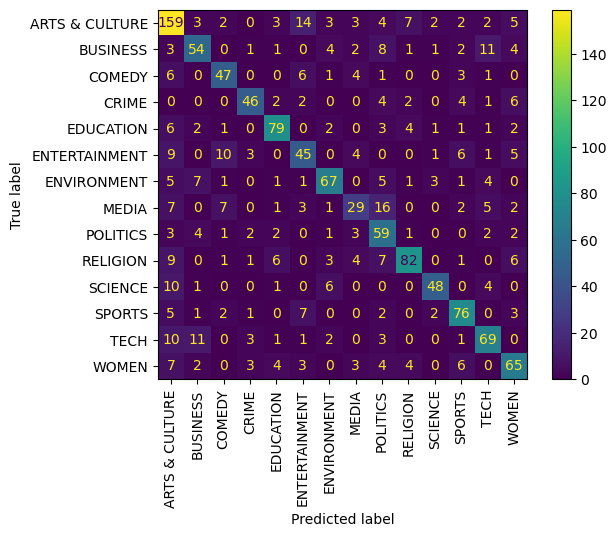

In [34]:
Mteric_s = T.time()

pe_Data2 = Mo_News.predict(is_Data2)
print(CR(os_Data2,pe_Data2))
L = CM(os_Data2,pe_Data2)
D = CMD(confusion_matrix = L, display_labels = ['ARTS & CULTURE','BUSINESS','COMEDY','CRIME','EDUCATION', 'ENTERTAINMENT','ENVIRONMENT','MEDIA','POLITICS','RELIGION','SCIENCE','SPORTS','TECH','WOMEN'])
D.plot(xticks_rotation=90)

Mteric_d = T.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

In [35]:
accuracy_GB = round(accuracy_score(os_Data2,pe_Data2),2)
accuracy_GB

0.68

## **Neural Network Algorithms**

**Multi Layer Perceptron**

In [36]:
from sklearn.neural_network import MLPClassifier as MLP

ONA_K = {'learning_rate': ['constant', 'invscaling', 'adaptive'],
            'solver': ['adam','lbfgs', 'sgd']}

ONA_KM = MLP(random_state= 223)
ONA_KM = GS(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_Data2[:500],or_Data2[:500])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'learning_rate': 'constant', 'solver': 'adam'}
0.61


In [37]:
Mteric_s = T.time()

Mo_News = MLP(**ONA_KM.best_params_)
Mo_News.fit(ir_Data2, or_Data2)

Mteric_d = T.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 11.423506021499634


MLPClassifier()

                precision    recall  f1-score   support

ARTS & CULTURE       0.13      0.17      0.15       184
      BUSINESS       0.09      0.07      0.08       112
        COMEDY       0.08      0.08      0.08        79
         CRIME       0.07      0.06      0.06        72
     EDUCATION       0.04      0.04      0.04        98
 ENTERTAINMENT       0.02      0.02      0.02       107
   ENVIRONMENT       0.08      0.07      0.08        96
         MEDIA       0.15      0.10      0.12        84
      POLITICS       0.07      0.08      0.08        95
      RELIGION       0.10      0.09      0.10       107
       SCIENCE       0.07      0.05      0.06        74
        SPORTS       0.08      0.11      0.09        76
          TECH       0.09      0.10      0.09        89
         WOMEN       0.08      0.09      0.08        90

      accuracy                           0.09      1363
     macro avg       0.08      0.08      0.08      1363
  weighted avg       0.09      0.09      0.08 

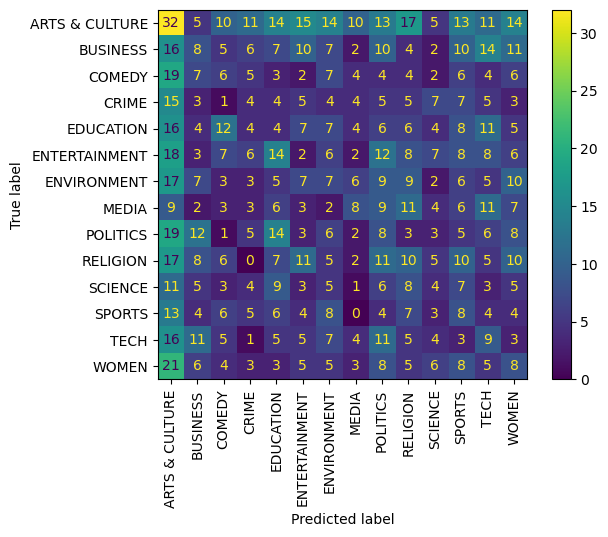

In [38]:
Mteric_s = T.time()

pe_ON_NeWs_ATL = Mo_News.predict(iv_Data2)
print(CR(ov_Data2,pe_Data2))
L = CM(ov_Data2,pe_Data2)
D = CMD(confusion_matrix = L, display_labels = ['ARTS & CULTURE','BUSINESS','COMEDY','CRIME','EDUCATION', 'ENTERTAINMENT','ENVIRONMENT','MEDIA','POLITICS','RELIGION','SCIENCE','SPORTS','TECH','WOMEN'])
D.plot(xticks_rotation=90)

Mteric_d = T.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

                precision    recall  f1-score   support

ARTS & CULTURE       0.75      0.78      0.77       209
      BUSINESS       0.67      0.53      0.59        92
        COMEDY       0.61      0.71      0.66        69
         CRIME       0.72      0.87      0.79        67
     EDUCATION       0.80      0.87      0.84       102
 ENTERTAINMENT       0.55      0.57      0.56        84
   ENVIRONMENT       0.67      0.77      0.71        96
         MEDIA       0.64      0.47      0.54        73
      POLITICS       0.55      0.72      0.62        80
      RELIGION       0.84      0.71      0.77       120
       SCIENCE       0.81      0.66      0.72        70
        SPORTS       0.81      0.80      0.80        99
          TECH       0.64      0.64      0.64       101
         WOMEN       0.72      0.62      0.67       101

      accuracy                           0.71      1363
     macro avg       0.70      0.69      0.69      1363
  weighted avg       0.71      0.71      0.70 

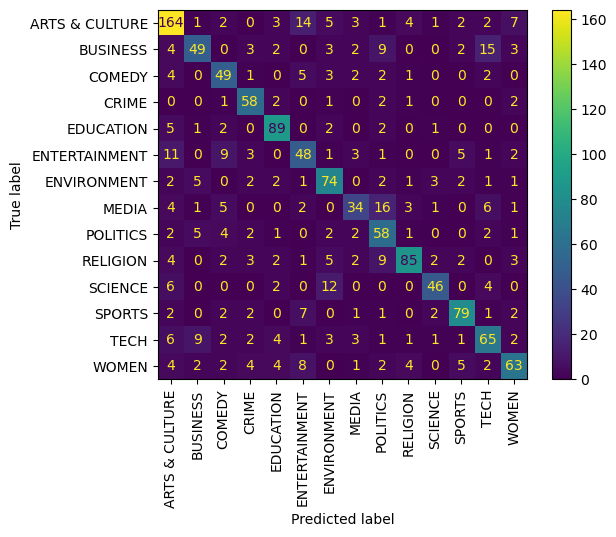

In [39]:
Mteric_s = T.time()

pe_Data2 = Mo_News.predict(is_Data2)
print(CR(os_Data2,pe_Data2))
L = CM(os_Data2,pe_Data2)
D = CMD(confusion_matrix = L, display_labels = ['ARTS & CULTURE','BUSINESS','COMEDY','CRIME','EDUCATION', 'ENTERTAINMENT','ENVIRONMENT','MEDIA','POLITICS','RELIGION','SCIENCE','SPORTS','TECH','WOMEN'])
D.plot(xticks_rotation=90)

Mteric_d = T.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

In [40]:
accuracy_MLP = round(accuracy_score(os_Data2,pe_Data2),2)
accuracy_MLP

0.71

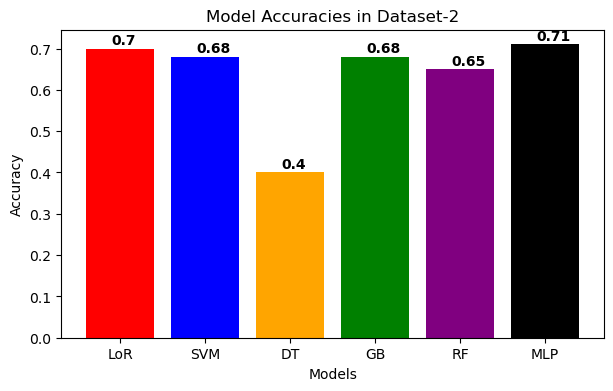

In [42]:
import matplotlib.pyplot as plt

models = ['LoR','SVM','DT','GB','RF', 'MLP']
accuracies = [accuracy_LR,accuracy_SVM,accuracy_DT,accuracy_GB,accuracy_RF,accuracy_MLP]

# set up the bar plot
plt.figure(figsize=(7,4))
plt.bar(models, accuracies, color=['red','blue','orange','green','purple','black'])

# add title and labels
plt.title('Model Accuracies in Dataset-2')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# add the accuracies as text labels on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i-0.1, v+0.01, v, color='black', fontweight='bold')

# show the plot
plt.show()